In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# Load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.label

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

In [5]:
# Split the dataset into dependent (target) and independent (features) variables
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = pima[feature_cols]
y = pima.label

In [6]:
# Split dataset into training set and testing set
# 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [7]:
# Decision Tree classifier object instantiation
clf = DecisionTreeClassifier()
# The Decision Tree Classifier is trained
clf = clf.fit(x_train, y_train)
# Use the classifier just trained to predict using the test dataset
y_pred = clf.predict(x_test)

In [8]:
# Finding the model accuracy
# The actual test set values and predicted values are compared
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7056277056277056


In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

/Users/juanestebanmendez/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


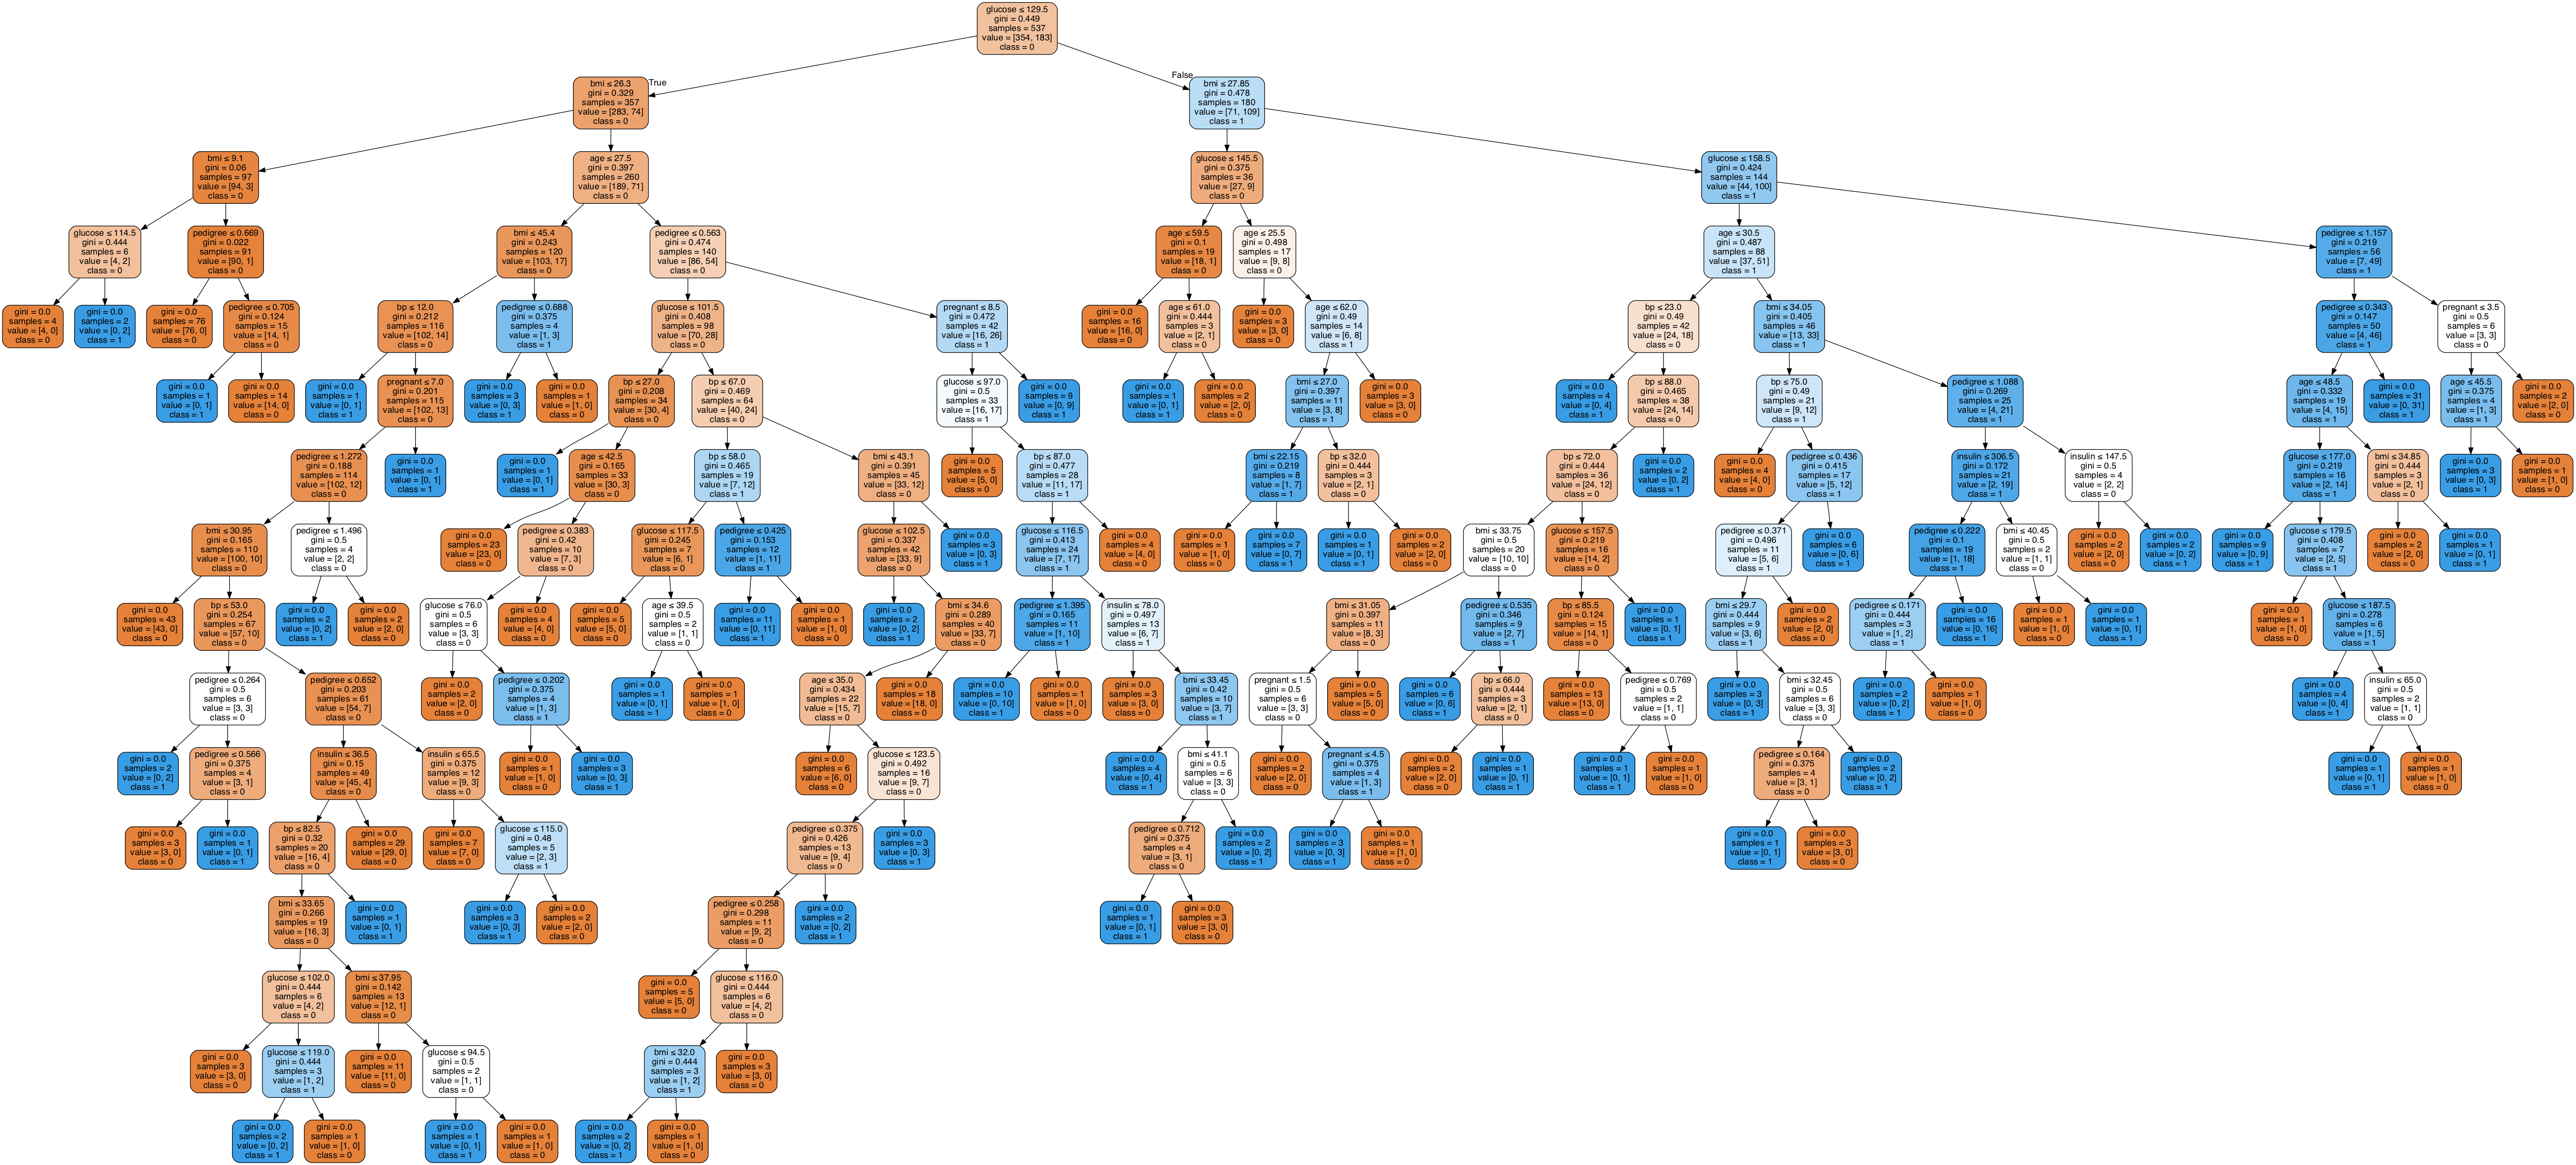

In [10]:
# Create visualization of the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [12]:
# Create a different decision tree classifier, using entropy as the Attribute Selection Measure (ASM)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train model
clf = clf.fit(x_train, y_train)
# Predict the target values
y_pred = clf.predict(x_test)
# Find model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


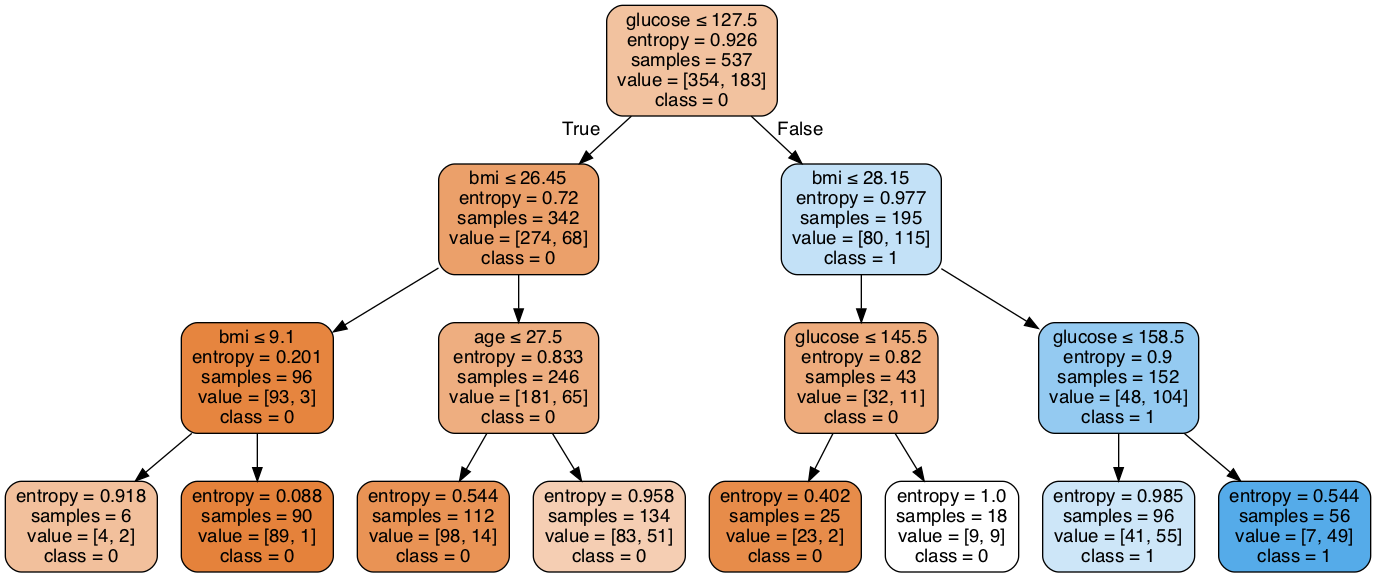

In [13]:
# Create visualization of the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes-2.png')
Image(graph.create_png())